In [1]:
from periodic_orbits import is_periodic, is_equilibrium, stg_coordinate, get_periodic_domains
from ode_functions import theta_from_param,ic_function, fun, convert_to_dict, get_parameter_node, get_ic_domain, plot_projections, plot_time_series, plot_phase_projection
from ipynb.fs.full.ode_functions import *
from periodic_orbits2 import check_sequence
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.decomposition import PCA

In [2]:
#decay rates
decays = {'d_p' : 1, 'd_mc' : 1, 'd_mn' : 1}

#hill coefficient
n = 90

#ode solver parameters
t0 = 0
tf = 100

In [3]:
#Import parameters

b1 = pd.read_csv("Parameter_datasets/P1BBWnode1.csv", header = None)
bparams1 = convert_to_dict(b1)

b2 = pd.read_csv("Parameter_datasets/P1BBWnode2.csv", header = None)
bparams2 = convert_to_dict(b2)

b3 = pd.read_csv("Parameter_datasets/P1BBWnode3.csv", header = None)
bparams3 = convert_to_dict(b3)

b4 = pd.read_csv("Parameter_datasets/P1BBWnode4.csv", header = None)
bparams4 = convert_to_dict(b4)

b5 = pd.read_csv("Parameter_datasets/P1BBWnode5.csv", header = None)
bparams5 = convert_to_dict(b5)

b6 = pd.read_csv("Parameter_datasets/P1BBWnode6.csv", header = None)
bparams6 = convert_to_dict(b6)

b7 = pd.read_csv("Parameter_datasets/P1BBWnode7.csv", header = None)
bparams7 = convert_to_dict(b7)

b8 = pd.read_csv("Parameter_datasets/P1BBWnode8.csv", header = None)
bparams8 = convert_to_dict(b8)

b9 = pd.read_csv("Parameter_datasets/P1BBWnode9.csv", header = None)
bparams9 = convert_to_dict(b9)

b10 = pd.read_csv("Parameter_datasets/P1BBWnode10.csv", header = None)
bparams10 = convert_to_dict(b10)

b_params = [bparams1, bparams2, bparams3, bparams4, bparams5, bparams6, bparams7, bparams8, bparams9,
             bparams10]

In [4]:
#generate ICs in 111 region of parameter 1
b_ICs = []
for i in range(10):
    b_ICs.append(ic_function("111", b_params[0]))#111, 101 both produce consistent len 6 and 8

In [14]:
#compute orbit lengths for all parameter, initial condition combinations
b_lengths = []#store orbit lengths, each set of 10 lengths corresponds to different ICs within same parameter
b_sizes = []
for param in b_params:
    theta = theta_from_param(param)
    for IC in b_ICs:
        sol = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = IC, method = 'BDF')
        output = get_periodic_domains(sol.y,theta,num_periods_to_verify = 2)
        b_lengths.append(len(output))
        b_sizes.append(lower_double_id(output))

In [15]:
#observe orbit lengths (columns are different initial conditions)
endpts = [0,10,20,30,40,50,60,70,80,90,100]
for i in range(len(endpts)-1):
    print('b_param', i, ':', b_lengths[endpts[i]:endpts[i+1]])

b_param 0 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
b_param 1 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
b_param 2 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
b_param 3 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
b_param 4 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
b_param 5 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
b_param 6 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
b_param 7 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
b_param 8 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
b_param 9 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]


In [16]:
#observe orbit sizes (columns are different initial conditions)
endpts = [0,10,20,30,40,50,60,70,80,90,100]
for i in range(len(endpts)-1):
    print('b_param', i, ':', b_sizes[endpts[i]:endpts[i+1]])

b_param 0 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
b_param 1 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
b_param 2 : ['Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small']
b_param 3 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
b_param 4 : ['Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small']
b_param 5 : ['Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small']
b_param 6 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
b_param 7 : ['Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small']
b_param 8 : ['Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small']
b_param 9 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large

So we end up getting consistent length 6 or length 8 orbits within a given parameter for different initial conditions.

(0, 8.5)

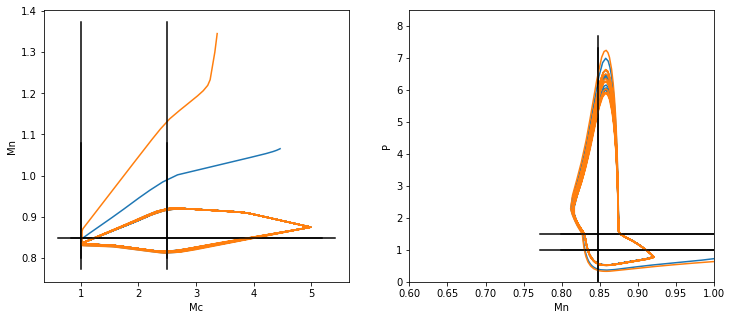

In [7]:
#compare two ICs
param = b_params[0]
sol0 = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = b_ICs[0], method = 'BDF')
sol1 = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = b_ICs[1], method = 'BDF')

fig,(ax1,ax2) = plot_projections(sol0, param)
plot_projections(sol1, param, axs = (ax1, ax2))
# ax1.set_xlim(1,2.75)
# ax1.set_ylim(0.3,0.8)
ax2.set_xlim(0.6,1)
ax2.set_ylim(0,8.5)

Now, examine all possibles lines of parameters between length 6 and a length 8 orbits to see if hysteresis is a possibility.

In [8]:
large, small = separate(b_params, '111')

In [12]:
line_list = generate_all_lines(small, large, 50)

In [13]:
%%time
check_list(line_list)

/Users/Erika/Documents/Math/Research/periodic_orbits.py:96: UserWarning: get_periodic_domains looked at all time points but did not verify a periodic sequence to desired verification level of num_periods_to_verify = 2. The trajectory may not be periodic.
  warnings.warn('get_periodic_domains looked at all time points but did not verify a periodic sequence to desired verification level of num_periods_to_verify = {}. The trajectory may not be periodic.'.format(num_periods_to_verify))


CPU times: user 6min 57s, sys: 3.52 s, total: 7min
Wall time: 15min 1s


[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

### PCA

In [19]:
#finally, label each parameter by its size (not length) for sake of PCA
#0 is small, 1 is large
b_param_colors = [1,1,0,1,0,0,1,0,0,1]

bdf1 = pd.DataFrame.from_dict(bparams1, orient = 'index')
bdf1 = bdf1.T
bdf2 = pd.DataFrame.from_dict(bparams2, orient = 'index')
bdf2 = bdf2.T
bdf3 = pd.DataFrame.from_dict(bparams3, orient = 'index')
bdf3 = bdf3.T
bdf4 = pd.DataFrame.from_dict(bparams4, orient = 'index')
bdf4 = bdf4.T
bdf5 = pd.DataFrame.from_dict(bparams5, orient = 'index')
bdf5 = bdf5.T
bdf6 = pd.DataFrame.from_dict(bparams6, orient = 'index')
bdf6 = bdf6.T
bdf7 = pd.DataFrame.from_dict(bparams7, orient = 'index')
bdf7 = bdf7.T
bdf8 = pd.DataFrame.from_dict(bparams8, orient = 'index')
bdf8 = bdf8.T
bdf9 = pd.DataFrame.from_dict(bparams9, orient = 'index')
bdf9 = bdf9.T
bdf10 = pd.DataFrame.from_dict(bparams10, orient = 'index')
bdf10 = bdf10.T

b_param_data = pd.concat([bdf1,bdf2,bdf3,bdf4,bdf5,bdf6,bdf7,bdf8,bdf9,bdf10])

b_param_data['OrbitLength'] = b_param_colors

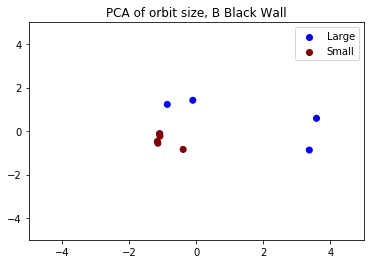

In [20]:
pca = PCA(n_components = 2)
pca.fit(b_param_data.iloc[:,0:17])
b_pca = pca.transform(b_param_data.iloc[:,0:17])

labels = b_param_data.loc[:,'OrbitLength']
label_colors = {0:'maroon',1:'blue'}
cvec = [label_colors[label] for label in labels]
plt.scatter(b_pca[:,0],b_pca[:,1], c = cvec)
plt.scatter(25,25,c = 'blue',label = 'Large')#point at (25,25) just for labeling purposes
plt.scatter(25,25,c = 'maroon', label = 'Small')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('PCA of orbit size, B Black Wall')
plt.legend(loc = 'best')
# plt.savefig('pca_all_attributes.png')
plt.show()
plt.close()

Perhaps a small bit of separation exists?